In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

In [2]:
dat_files = glob.glob("./*.dat")
print(dat_files)

['.\\102.94K.dat', '.\\107.94 K.dat', '.\\112.94 K.dat', '.\\117.94 K.dat', '.\\12.987 K.dat', '.\\122.94K.dat', '.\\127.94 K.dat', '.\\132.94 K.dat', '.\\137.94 K.dat', '.\\142.94K.dat', '.\\147.94 K.dat', '.\\152.94 K.dat', '.\\157.94 K.dat', '.\\162.94K.dat', '.\\167.94 K.dat', '.\\17.943 K.dat', '.\\172.94 K.dat', '.\\177.94 K.dat', '.\\182.94K.dat', '.\\187.94 K.dat', '.\\192.94 K.dat', '.\\197.94 K.dat', '.\\202.94K.dat', '.\\207.94 K.dat', '.\\212.94 K.dat', '.\\217.94 K.dat', '.\\22.941 K.dat', '.\\222.94K.dat', '.\\227.94 K.dat', '.\\232.94 K.dat', '.\\237.94 K.dat', '.\\242.94K.dat', '.\\247.94 K.dat', '.\\252.94 K.dat', '.\\257.94 K.dat', '.\\262.94K.dat', '.\\267.94 K.dat', '.\\27.939 K.dat', '.\\272.94 K.dat', '.\\277.94 K.dat', '.\\282.94K.dat', '.\\287.94 K.dat', '.\\292.94K.dat', '.\\32.939 K.dat', '.\\37.946 K.dat', '.\\42.977 K.dat', '.\\47.954 K.dat', '.\\52.946 K.dat', '.\\57.948 K.dat', '.\\62.944 K.dat', '.\\67.941 K.dat', '.\\72.94 K.dat', '.\\77.938K.dat', '.\\8

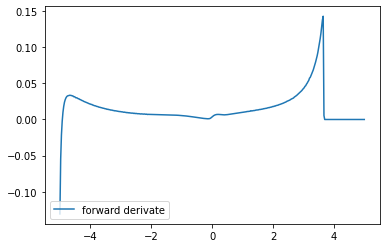

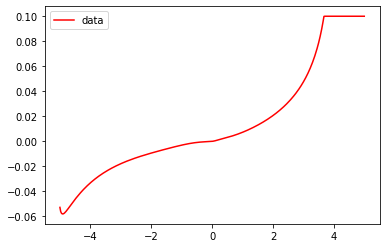

In [25]:
# only for one plot
a=np.loadtxt('292.94K.dat')
x=a[:,0]
y=a[:,1]

# derivada
dyforward=[0.0]*len(x)
for i in range(len(y)-1):
    dyforward[i]=(y[i+1]-y[i])/(x[i+1]-x[i])

dyforward[-1]=(y[-1]-y[-2])/(x[-1]-x[-2])


# plots
plt.figure(1)
plt.plot(x, dyforward, label='forward derivate')
plt.legend(loc='lower left')

plt.figure(2)
plt.plot(x, y, color='r', label='data')
plt.legend()
plt.show()


In [4]:
# some functions

def return_values_der(file_name):
    a=np.loadtxt(file_name)
    x=a[:,0]
    y=a[:,1]

    # derivada
    dyforward=[0.0]*len(x)
    for i in range(len(y)-1):
        dyforward[i]=(y[i+1]-y[i])/(x[i+1]-x[i])

    dyforward[-1]=(y[-1]-y[-2])/(x[-1]-x[-2])
    print(dyforward)


def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

def whole_points(file_name):
    a=np.loadtxt(file_name)
    x=a[:,0]
    y=a[:,1]

    # derivada
    dyforward=[0.0]*len(x)
    for i in range(len(y)-1):
        dyforward[i]=(y[i+1]-y[i])/(x[i+1]-x[i])

    dyforward[-1]=(y[-1]-y[-2])/(x[-1]-x[-2])

    values_to_test = list(range(-5,6))
    results = []
    x_dis = []
    y_dis = []
    for value in values_to_test:
        x_nearest = find_nearest(x, value)
        x_nearest_index = np.where(x == x_nearest)
        x_dis.append(value)
        y_dis.append(dyforward[int(x_nearest_index[0])])
        results.append([value, x_nearest, float(x_nearest_index[0]), dyforward[int(x_nearest_index[0])]])

    return x, dyforward, x_dis, y_dis


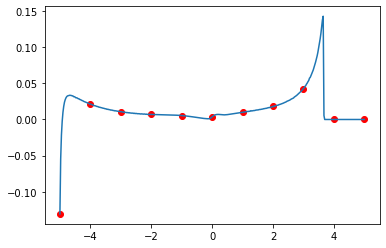

In [24]:
# test plots
file_name = '292.94K.dat'
x, dyforward, x_dis, y_dis = whole_points(file_name)
plt.figure(1)
plt.plot(x, dyforward, label='forward derivate')
plt.scatter(x_dis, y_dis, color = 'red')

In [21]:
results = []
for dat in dat_files:
    x, dyforward, x_dis, y_dis = whole_points(dat)
    temperature = float(dat.replace("K.dat", "").replace(".\\", "").replace(" ","").replace(" ",""))
    res = [temperature]
    res.extend(y_dis)
    results.append([res])
    
    # plt.figure(1)
    # # plt.plot(x, dyforward, label='dat')
    # # plt.scatter(x_dis, y_dis, color = 'red', label='dat')
    # plt.scatter(x_dis, y_dis, label=dat)
    # plt.legend()

In [28]:
import csv

with open("out.csv", "w") as f:
    wr = csv.writer(f)
    wr.writerows(results)